In [42]:
from platform import python_version

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# seed
RANDOM_STATE = 1776

# set seaborn theme
sns.set_theme()

# print versions
print("Numpy Version: " + np.__version__)
print("Pandas Version: " + pd.__version__)
print("Seaborn Version: " + sns.__version__)
print("Matplotlib Version: " + plt.matplotlib.__version__)
print("Python Version: " + python_version())

# adjust pandas display options to max
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# adjust pandas display options to ensure full display of content
pd.set_option('display.max_colwidth', None)

Numpy Version: 1.26.4
Pandas Version: 2.2.3
Seaborn Version: 0.13.2
Matplotlib Version: 3.9.2
Python Version: 3.9.20


### Import Data

In [43]:
# full dataframe
df = pd.read_pickle("../Data/CleanFullLabelsML.pkl")

# data dictionary
df_dict = pd.read_pickle("../Data/FinalcolumnDefinitionML.pkl")

# data label
df_label = pd.read_pickle("../Data/colLabelML.pkl") 

# boolean
df_bool = pd.read_pickle("../Data/colBooleanML.pkl")

# nominal
df_nominal = pd.read_pickle("../Data/colNominalML.pkl")

# ordinal
df_ordinal = pd.read_pickle("../Data/colOrdinalML.pkl")

# numeric
df_numeric = pd.read_pickle("../Data/colNumericML.pkl")

# checking for duplicated column name
df.columns[df.columns.duplicated()]

Index([], dtype='object')

#### Data Shape

In [3]:
# df DataFrame
print(f"Orginal Data file Shape: {df.shape}")
print(f"Label(s) Data rows: {len(df_label)}")
print(f"Boolean(s) Data rows: {len(df_bool)}")
print(f"Ordinal(s) Data rows: {len(df_ordinal)}")
print(f"Nominal(s) Data rows: {len(df_nominal)}")
print(f"Numeric(s) Data rows: {len(df_numeric)}")

Orginal Data file Shape: (14856, 124)
Label(s) Data rows: 13
Boolean(s) Data rows: 11
Ordinal(s) Data rows: 15
Nominal(s) Data rows: 79
Numeric(s) Data rows: 19


### User Function(s):

In [4]:
def percentageNull(df):
    """
    Calculate percentage of NaN & NaN count
    """
    # calculate the percentage of non-null values for each column
    per_calc = pd.DataFrame(100 - (df.count() / len(df) * 100))
    
    # rename columns name
    per_calc.rename(columns={0: 'percentage'}, inplace=True)

    # add counter
    per_calc['NaNCount'] = df.isna().sum()
    
    # sort
    per_calc.sort_values(by='percentage', inplace=True, ascending=False)

    # 
    NanReturn = per_calc[per_calc.NaNCount != 0]
    
    return NanReturn


def DefinitionSearch(datadic, col, flag=False):
    # initialize variable
    parm =  "r'(?i)" + col + "'" # regex search using ignore case sensitivity
    parm = eval(parm)
    # display
    df_str = datadic.loc[:,['featureName','desc', 'dataType', 'labelSAS', 'COMMENT', 'Information']][datadic.featureName.str.contains(parm)]

    if flag:
        feature = datadic.featureName[datadic.featureName.str.contains(parm)].tolist()
        return feature
    else:
        return df_str
    
    
def removeColumn(data, col):
    """
    Remove unwanted columns
    """
    # display removed feature(s)
    print(f"\nRemoved Features:{col}\n")
    # display shape of DataFrame
    print(f"Total rows before: {data.shape[0]:,} & columns: {data.shape[1]:,}")
    
    # remove column
    data.drop(columns=col, axis=1, inplace=True)

    # reset index in place
    data.reset_index(drop=True, inplace=True)

    # display shape of DataFrame
    print(f"Total rows after: {data.shape[0]:,} & columns: {data.shape[1]:,}")

    return data


def removeRowUsingMask(data, removeColLst, colstr):
    # boolean mask
    mask = ~data[colstr].isin(removeColLst)
    
    # apply the mask to keep only rows where 'removeColLst'
    data = data[mask]
    
    # reset the index if needed
    data = data.reset_index(drop=True)

    # disply row removed msg
    print(f"Remove row(s) from df_{colstr} DataFrame.")

    return data

    
def updateDataDict(data, remove, col="COMMENT"):
    """
    Maintain data dictionary
    """
    # update data dictionary
    idx = data[data.featureName.isin(remove)].index
    # append to exiting data
    data.loc[idx,col] = "**REMOVED 6** - " + data[col]

    # disply update msg
    print(f"Data Dictionary Updated.")

    return data


def removeHouseKeeping(data, removeColLst, dataBool, dataOrdinal, dataNominal, dataNumeric, dataLabel):
    """
    Run helper fuction for house keeping
    """
    # remove DataFrame data (house keeping)
    dataLabel = removeRowUsingMask(dataLabel, removeColLst, colstr='label')
    dataBool = removeRowUsingMask(dataBool, removeColLst, colstr='boolean')
    dataOrdinal = removeRowUsingMask(dataOrdinal, removeColLst, colstr='ordinal')
    dataNominal = removeRowUsingMask(dataNominal, removeColLst, colstr='nominal')
    dataNumeric = removeRowUsingMask(dataNumeric, removeColLst, colstr='numeric')
    
    # remove features
    data = removeColumn(data, removeColLst)

    return data, dataBool, dataOrdinal, dataNominal, dataNumeric, dataLabel


def datatypeDF(data, databool, datanominal, dataordinal, datanumeric):    
    # initialize variables for all the column name per each datatype
    boolCol = databool.boolean.to_list()
    nominalCol = datanominal.nominal.to_list()
    ordinalCol = dataordinal.ordinal.to_list()
    numericCol = datanumeric.numeric.to_list()

    print('Total Data feature count: ', df.shape[1])
    print(f"\nBoolean feature count: {len(boolCol)}")
    print(f"Nominal feature count: {len(nominalCol)}")
    print(f"Ordinal feature count: {len(ordinalCol)}")
    print(f"Numeric feature count: {len(numericCol)}")
    print('\nTotal feature count: ' ,len(boolCol) + len(nominalCol) + len(ordinalCol) + len(numericCol))

    # return list for each type
    return boolCol, nominalCol, ordinalCol, numericCol


def addtionalInfo(data, lst):
    # iterate
    for val in lst:
        # mode (first if multiple)
        modeValue = data[val].mode()[0]
        modePercentage = data[val].value_counts(normalize=True, dropna=False)[modeValue]
        modeCount = data[val].value_counts()[modeValue]
        unique = data[val].nunique(dropna=False)

        # display
        print(f"**{val}** Unique: {unique} & Mode: {modeValue} & Occurrence Count: {modeCount:,} & Percentage Occurrence: {(modePercentage * 100):.2f}%")


def removeCatZeroCount(data):
    """
    Remove category with no category values
    """
    # iterate each categorical column
    for column in data.select_dtypes(['category']).columns:
        # get counts of each category
        category_counts = data[column].value_counts()
        
        # remove categories with zero counts
        categories_to_keep = category_counts[category_counts > 0].index
        data[column] = data[column].cat.remove_categories([cat for cat in data[column].cat.categories if cat not in categories_to_keep])

    return data

### User Function(s)

In [5]:
def classifier_metrics(model, Xdata, ydata, flag = None):
    """
    Classfication metric for Project incldues 
    Model metrics & Confusion Matrix.
    """
    # predictions
    pred = model.predict(Xdata)
    
    # create confusion matrix
    cm = metrics.confusion_matrix(ydata, pred, labels=model.classes_)
    
    # initialize variable
    TN, FP, FN, TP = cm.ravel()
    Spec = TN / (TN + FP)
    Recall = TP / (TP + FN)
    Acc = (TP + TN) / (TP + TN + FP + FN)

    if (TP + FP) == 0:
        Prec = 0  # Set precision to 0 when denominator is 0
    else:
        Prec = TP / (TP + FP)
    
    # Prec = TP / (TP + FP)
    if (Prec + Recall) == 0:
        F1Score = 0  # Set F1Score to 0 when denominator is 0
    else:
        F1Score = 2 * (Prec * Recall) / (Prec + Recall)
    # F1Score = 2 * (Prec * Recall) / (Prec + Recall)
    AvgPrec = metrics.average_precision_score(ydata,pred)
        
    # print msgs
    if flag:
        print("*" * 5 + " Classfication Metrics for Validation/Test:")
    else:
        print("*" * 5 + " Classfication Metrics for Training:")
        
    # classification report for more metrics
    print("Classification Report:\n", metrics.classification_report(ydata, pred, zero_division=0))

    # create the ConfusionMatrixDisplay with labels
    cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels = model.classes_)

    # plot the confusion matrix
    cm_display.plot(cmap='Blues', values_format='d', colorbar=False)
    
    #
    if flag:
        cm_display.ax_.set_title("Validation/Test Confusion Matrix")
    else:
        cm_display.ax_.set_title("Training Confusion Matrix")

    # remove grid from plot
    plt.grid(False)
    # plot
    plt.show()
    # spacing
    print("\n")

    # calculate ROC curve and AUC
    fpr, tpr, _ = metrics.roc_curve(ydata, pred)
    roc_auc = metrics.auc(fpr, tpr)
    
    # plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    return Spec, Recall, Acc, Prec, F1Score, AvgPrec, roc_auc


def stratified_grid(model, parameters, Xdata, ydata, nSplit=5, score = 'roc_auc'):
    """
    Ten fold CV Stratified
    """
    # instantiate Stratified K-Fold cross-validation takes into account the class distribution
    cv = StratifiedKFold(n_splits=nSplit, shuffle=True, random_state=RANDOM_STATE)

    # perform GridSearchCV
    GSC_estimator = GridSearchCV(model, parameters, scoring=score, cv=cv, n_jobs=-1)

    # evaluate a score by cross-validation
    scores = cross_val_score(GSC_estimator, X=Xdata, y=ydata, scoring=score, cv=cv, n_jobs=-1)

    # print average accuracy score CV with standard deviation
    print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

    # fit model
    fit = GSC_estimator.fit(Xdata, ydata)
    
    return fit


def plotFeatureImportance(model, Xdata, figsize=(30,30)):
    """
    Plot feature importance from the model
    Order List & Bar Plot of Importance
    """
    # create dataframe
    data = pd.DataFrame(model.feature_importances_ * 100, index=Xdata.columns, columns=["% Feature Importance"])
    print(data.sort_values("% Feature Importance", axis=0, ascending=False))
    # bar plot
    plt.figure(figsize=figsize)
    # create a bar plot using Seaborn
    ax = sns.barplot(data=data, y=data.index, x = data['% Feature Importance'], orient= 'h')
    ax.set_title("Feature Importance Bar Plot", fontsize = 15)
    # add a grid to the x-axis/
    plt.grid(axis='x', linestyle='--')
    plt.show()


def metricsClassfication(Algorithm, Model, Desc, Type, S, R, A, P, F, AP, Auc):
    """
    Pass Classfication metrics and Model Information
    """
    # initialize DataFrame
    data = pd.DataFrame(columns=['Algorithm', 'Model', 'Description', 'DataType', 'Accuracy', 'RecallSensitivity','F1Score', 'AveragePrecision', 'Precision','Specificity', 'ROC_AUC_Score'])
    # write to DataFrame
    data.loc[len(data)] = [Algorithm, Model, Desc, Type, A, R, F, AP, P, S, Auc]

    return data


def metricsClassifier(model, Xdata, ydata, data, flag='Train'):
    # initialize variable
    Type = flag
    
    if Type == 'Train':
        Test = False
    else:
        Test = True
    
    # display report - training
    S, R, A, P, F, AP, Auc = classifier_metrics(model, Xdata, ydata, Test)
        
    # add to DataFrame
    df_metrics = metricsClassfication(Algorithm, Model, Desc, Type, S, R, A, P, F, AP, Auc)
    
    # concat two dataframes
    data = pd.concat([data, df_metrics], ignore_index=True)
    
    # reset the index
    data.reset_index(drop=True, inplace=True)
    
    return data


# import library
from scipy.stats import chi2_contingency
from itertools import combinations


def pairColsMultiIndependenceCat(data, catCol):
    """
    Hypothesis testing using Chi-square statistic and calculating Cramer's V to 
    build consensus for all the categorical variables. 
    """
    # initialize variables
    results = []
    validCols = [col for col in catCol if col in data.columns]

    # use combinations to get unique pairs of columns
    for col1, col2 in combinations(validCols, 2):
        # create a contingency table
        contingencyTable = pd.crosstab(data[col1], data[col2])
        chi2, p_value, _, _ = chi2_contingency(contingencyTable)
        # total number of observations
        n = contingencyTable.values.sum()
        # get the number of categories in each variable (rows and columns)
        r, k = contingencyTable.shape
        min_dim = min(r-1, k-1)
        
        # handle division by zero
        if n * min_dim == 0:
            cramer_v = np.nan
        else:
            cramer_v = np.sqrt(chi2 / (n * min_dim))
        
        results.append({
            'column1': col1,
            'column2': col2,
            'chi2': chi2,
            'p_value': p_value,
            'cramer_v': cramer_v
        })
    
    return pd.DataFrame(results).sort_values(by='cramer_v', ascending=False)
    
    
    
def testIndependenceCat(data, cat1, cat2, flag=False):
    """
    Hypothesis testing using Ch-square statistic and calculating Cramer's V to 
    build consensus for two categorical variables.
    """
    # create a contingency table
    contingencyTable = pd.crosstab(data[cat1], data[cat2])
    # perform Chi-square test
    chi2, p_value, _, _ = chi2_contingency(contingencyTable)
    
    # total number of observations
    n = contingencyTable.sum().sum()
    # get the number of categories in each variable (rows and columns)
    r, k = contingencyTable.shape
    # calculate Cramer's V
    cramer_v = np.sqrt(chi2 / (n * min(k-1, r-1)))

    # display
    print(f"Test of Independence for Catergorical Variables: {cat1} & {cat2}")
    print(f"Chi-square statistic: {chi2:,.2f}")
    print(f"p-value: {p_value:,.4f}")
    print(f"Cramer's V: {cramer_v:,.4f}")

    if flag:
        return contingencyTable

In [6]:
# display NaNs
DFNaN = percentageNull(df)

# display
DFNaN.head(15)

,percentage,NaNCount


In [7]:
df_label

,label
0,FollowUpFunctionalStatus_CAN
1,AirwayDehiscencePostTransplant_CAN
2,AcuteRejectionEpisode_CAN
3,StrokePostTransplant_CAN
4,PacemakerPostTransplant_CAN
5,GraftFailed_CAN
6,LastFollowupNumber_CAN
7,TransplantStatus_CAN
8,TransplantSurvivalDay_CAN
9,RecipientStatus_CAN


In [8]:
# select label for classification
removeCol = df_label.label.to_list()

# remove GraftFailed_CAN
removeCol.remove('GraftFailed_CAN')

# remove unwanted features
df, df_bool, df_ordinal, df_nominal, df_numeric, df_label = removeHouseKeeping(df, removeCol, df_bool, df_ordinal, df_nominal, df_numeric, df_label)

Remove row(s) from df_label DataFrame.
Remove row(s) from df_boolean DataFrame.
Remove row(s) from df_ordinal DataFrame.
Remove row(s) from df_nominal DataFrame.
Remove row(s) from df_numeric DataFrame.

Removed Features:['FollowUpFunctionalStatus_CAN', 'AirwayDehiscencePostTransplant_CAN', 'AcuteRejectionEpisode_CAN', 'StrokePostTransplant_CAN', 'PacemakerPostTransplant_CAN', 'LastFollowupNumber_CAN', 'TransplantStatus_CAN', 'TransplantSurvivalDay_CAN', 'RecipientStatus_CAN', 'RejectionTreatmentWithinOneYear_CAN', 'GraftStatus_CAN', 'LengthOfStay_CAN']

Total rows before: 14,856 & columns: 124
Total rows after: 14,856 & columns: 112


In [9]:
# initialize list with feature names
boolCol, nominalCol, ordinalCol, numericCol = datatypeDF(df, df_bool, df_nominal, df_ordinal, df_numeric)

Total Data feature count:  112

Boolean feature count: 10
Nominal feature count: 70
Ordinal feature count: 15
Numeric feature count: 17

Total feature count:  112


### Encode

In [10]:
df[nominalCol].head()

,Transfusion_CAN,Result_RPR_VDRL_DON,SerologyAntiCMV_DON,ArginnieManagement_DON,GraftFailed_CAN,Diuretics_DON,HeartProcedureType_CAN,InfectionTherapyIV_CAN,EpsteinBarrStatusTransplant_CAN,Thyroxine_T4_DON,AntibodyResultHBSAB_DON,CardiacArrest_DON,Antibody_HEP_C_DON,LV_EjectionFractionMedthod_DON,SurfaceAntigenHEP_B_CAN,AtTransplantSurfaceHBVAntibodyTotal_CAN,Hepatitis_B_CoreAntibody_DON,Hepatitis_B_CoreAntibody_CAN,DiagnosisType_CAN,TransplantSerostatusHIV_CAN,SurfaceAntigenHEP_B_DON,Triiodothyronine_T3_DON,CocaineUse_DON,PanelReactiveAntibody_CPRA_CAN,PastOtherDrugUse_DON,HeavyAlcoholUse_DON,SteroidsUse_DON,CerebrovascularDisease_CAN,Tatoos_DON,PastCocaineUse_DON,Diabetes_CAN,CigaretteUse_CAN,OtherDrugUse_DON,Biopsy_DON,ChronicSteroidsUse_CAN,SerostatusStatus_HEP_C_CAN,HeparinManagement_DON,InsulinManagement_DON,ClinicalInfection_DON,CMVStatusAtTransplant_CAN,NonHeartBeating_DON,UrinePortein_DON,DefibrillatorImplant_CAN,DeathMechanism_DON,TransfusionNumber_DON,SynthicAntiDiureticHormone_DON,Vasodilator_DON,InotropicMedication_DON,PriorCardiacSurgery_CAN,DeceasedRetyped_DON,CoronaryAngiogram_DON,PriorLungSurgery_CAN,PulmCath_DON,OtherInfectionSource_DON,Antihypertensive_DON,RiskHIV_DON,CrossMatch,MyocardialInfarction_DON,Hypertension_DON,PreviousMalignancy_CAN,CigaretteHistory_DON,DialysisAfterList_CAN,ChestXray_DON,Bronchoscopy_DON_Combined,Cancer_DON_Combined,EpsteinBarr_DON_Combined,IntropesVasodilators_CAN_Combined,LifeSupport_CAN_Combined,PreTranspantNAT_CAN_Combined,ResultNAT_DON_Combined
0,Y,Negative,Positive,Y,0,Y,Orthotopic Bicaval,N,Positive,N,Unknown,N,Negative,Echo,Negative,Negative,Negative,Negative,DILATED MYOPATHY,Negative,Negative,N,U,Low Sensitization,Y,N,Y,N,Y,N,Yes,Y,Y,Needle,N,Negative,Y,N,Y,Positive,N,N,Y,GUNSHOT WOUND,NONE,N,N,N,N,N,Unknown,N,N,0,N,N,Y,N,N,N,N,N,Abnormal,Abnormal,No,Positive,No,Yes,Unknown,Negative
1,N,Negative,Positive,N,1,Y,Orthotopic Traditional,Y,Positive,N,Unknown,N,Negative,Echo,Negative,Negative,Negative,Negative,DILATED MYOPATHY,Negative,Negative,N,N,Some Sensitization,N,N,Y,N,Y,Y,No,N,U,Needle,N,Negative,N,Y,Y,Positive,N,N,Y,CARDIOVASCULAR,NONE,N,Y,N,N,N,Normal,N,N,0,Y,N,Y,N,N,N,N,N,Normal,Normal,No,Positive,No,Yes,Unknown,Negative
2,N,Negative,Positive,Y,0,Y,Orthotopic Bicaval,N,Positive,N,Unknown,N,Negative,Echo,Negative,Negative,Negative,Negative,DILATED MYOPATHY,Negative,Negative,N,U,Some Sensitization,N,N,Y,N,N,N,No,N,U,Needle,N,Negative,Y,Y,Y,Positive,N,N,Y,DRUG INTOXICATION,1 - 5,N,Y,N,Y,Y,Normal,N,N,0,Y,N,Y,N,N,N,N,N,Abnormal,Normal,No,Unknown,No,Yes,Unknown,Negative
3,N,Negative,Positive,N,1,Y,Orthotopic Bicaval,N,Positive,Y,Negative,N,Negative,Echo,Negative,Negative,Negative,Negative,DILATED MYOPATHY,Negative,Negative,N,U,Unknown,N,N,Y,N,N,N,No,Y,U,Needle,N,Negative,Y,Y,Y,Positive,N,Y,Y,INTRACRANIAL HEMORRHAGE/STROKE,6 - 10,N,N,Y,N,Y,Normal,N,N,0,N,N,Y,N,Y,N,N,N,Abnormal,Unknown,No,Positive,Yes,Yes,Unknown,Negative
4,N,Negative,Positive,Y,0,Y,Orthotopic Bicaval,N,Positive,Y,Unknown,N,Negative,Echo,Negative,Negative,Negative,Negative,DILATED MYOPATHY,Negative,Negative,N,U,No Sensitization,N,N,Y,N,N,N,No,Y,U,Needle,N,Negative,Y,N,Y,Negative,N,N,N,INTRACRANIAL HEMORRHAGE/STROKE,NONE,N,Y,N,Y,N,Unknown,N,N,0,Y,N,Y,N,N,N,N,N,Abnormal,Unknown,No,Positive,No,Yes,Unknown,Negative


In [11]:
# display label
df.GraftFailed_CAN.value_counts(dropna=False)

GraftFailed_CAN
0    12956
1     1900
Name: count, dtype: int64

#### Split Testing & Validation & Training

In [12]:
# split test and train
from sklearn.model_selection import train_test_split

def EncodeDummyTrainValTest(data, labelTxt, nominalColumns, seed):

    # remove label column from nominalColumns if it exists
    if labelTxt in nominalColumns:
        # remove label
        nominalColumns.remove(labelTxt)

    # dummy Encoding
    df_encoded = pd.get_dummies(data, columns=nominalColumns, drop_first=True)

    # entire features
    X = df_encoded.drop(labelTxt, axis=1)
    y = df_encoded[labelTxt]
    
    # split the dataset into 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)
    
    # split train data into validation
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed, stratify=y_train)
    
    # display shape
    print(f"Training Dependent Shape: {X_train.shape} & Label Shape: {y_train.shape}")
    print(f"Validation Dependent Shape: {X_val.shape} & Label Shape: {y_val.shape}")
    print(f"Testing Dependent Shape: {X_test.shape} & Label Shape: {y_test.shape}")

    return  X, y, X_train, X_test, X_val, y_train, y_val, y_test

In [13]:
# split dataset
X, y, X_train, X_test, X_val, y_train, y_val, y_test = EncodeDummyTrainValTest(df, 'GraftFailed_CAN', nominalCol, RANDOM_STATE)

Training Dependent Shape: (9507, 207) & Label Shape: (9507,)
Validation Dependent Shape: (2377, 207) & Label Shape: (2377,)
Testing Dependent Shape: (2972, 207) & Label Shape: (2972,)


### Feature Selection

In [14]:
# import libraries
from sklearn.feature_selection import SelectKBest, f_classif, chi2, VarianceThreshold, mutual_info_classif
from boruta import BorutaPy

def selectKClassif(Xdata, ydata, K='all', function='f_classif'):

    # remove constant features
    constanFilter = VarianceThreshold(threshold=0)  # removes features with zero variance
    X_data = constanFilter.fit_transform(Xdata)

    # update feature names after removing constant features
    remaining_feature_names = Xdata.columns[constanFilter.get_support(indices=True)]
    
    # Step 3: Apply SelectKBest with F-classif
    selector = SelectKBest(score_func=eval(function), k=K)
    X_new = selector.fit_transform(X_data, ydata)

    # update feature names to reflect remaining, selected features
    selected_List = [remaining_feature_names[i] for i in selector.get_support(indices=True)]
    
    # create a DataFrame with selected features and their F-scores
    feature_scores = selector.scores_

    # access the p-values
    p_values = selector.pvalues_

    # create DataFrame
    feature_scores_df = pd.DataFrame({
        'Feature': remaining_feature_names,
        'Score': feature_scores,
        'p_value': p_values
    }).sort_values(by='Score', ascending=False)

    # get ONLY selected Features
    DF_selected = feature_scores_df[feature_scores_df.Feature.isin(selected_List)]
    
    # retrun
    return DF_selected, selected_List



import re

def getColumnName(data):
    # get features with Unknown Category
    features = data.Feature[data['Feature'].str.contains('_U')].to_list()
    
    # extract the feature name up to (but not including) '_U'
    removeFeatures = [re.search(r'^(.*?)_U', feature).group(1) if '_U' in feature else feature for feature in features]
    
    # display
    print(removeFeatures)
    
    # return
    return removeFeatures

#### Boruta Feature Selection

In [15]:
from xgboost import XGBClassifier

# calculate the scale_pos_weight to adjust for class imbalance
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

# configure the XGBoost classifier
xgb_model = XGBClassifier(
    scale_pos_weight = scale_pos_weight,         
    n_estimators=100, 
    max_depth=5, 
    learning_rate=0.1, 
    random_state=RANDOM_STATE
)

# create and configure the BorutaPy object
boruta_selector = BorutaPy(
    estimator=xgb_model,
    n_estimators='auto',
    max_iter=100,  # number of iterations
    random_state=RANDOM_STATE
)

# fit BorutaPy
boruta_selector.fit(np.array(X_train), np.array(y_train))

# elected feature indices
selected_features = boruta_selector.support_

# tentative features (not fully confirmed, but not rejected)
weak_feature = boruta_selector.support_weak_

# Get feature ranking
feature_ranking = boruta_selector.ranking_

# Print selected features
print("Selected features:")
for feature, selected in zip(X_train.columns, selected_features):
    if selected:
        print(feature)

print("\nWeak features:")
for feature, selected in zip(X_train.columns, weak_feature):
    if selected:
        print(feature)

Selected features:
Transfusion_CAN_Y
Diabetes_CAN_Yes
DeathMechanism_DON_DRUG INTOXICATION
PriorCardiacSurgery_CAN_Y

Weak features:
CardiacArrest_DON_U
EpsteinBarr_DON_Combined_Positive


In [16]:
# get the feature names from your original dataset
feature_names = X_train.columns

# Create a DataFrame with feature names and their rankings
ranking_df = pd.DataFrame({
    'Feature': feature_names,
    'Ranking': feature_ranking
})

# sort the DataFrame by ranking (ascending order, so lower numbers are more important)
ranking_df = ranking_df.sort_values('Ranking')

# reset the index
ranking_df = ranking_df.reset_index(drop=True)

# display
ranking_df.head()

,Feature,Ranking
0,Diabetes_CAN_Yes,1
1,DeathMechanism_DON_DRUG INTOXICATION,1
2,Transfusion_CAN_Y,1
3,PriorCardiacSurgery_CAN_Y,1
4,CardiacArrest_DON_U,2


In [17]:
# select top 5 rankings
selected = ranking_df.Feature[ranking_df.Ranking <= 1].to_list()

print(f"There are total of {len(selected)} Features.\n")
print(selected)

There are total of 4 Features.

['Diabetes_CAN_Yes', 'DeathMechanism_DON_DRUG INTOXICATION', 'Transfusion_CAN_Y', 'PriorCardiacSurgery_CAN_Y']


In [18]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

### Logistic Regression

In [19]:
# define the hyperparameter grid to search
parameters = dict(
C = list(np.round(np.linspace(0.01, 5, 20),2)),
class_weight = ['balanced']
)

# Base Model
lrc_param = {'max_iter':10000, 'random_state': RANDOM_STATE}

# instantiate LogisticRegression Classifier
model = LogisticRegression(**lrc_param)

In [20]:
# initialize variables
Algorithm = 'LogisticRegression'
Desc = 'LogisticRegression - Grid Search - Boruta Feature Selection'
Model = 'lrc_boruta_fit'

# CV with grid search for Hyper-Parameter tuning
lrc_boruta_fit = stratified_grid(model, parameters, X_train[selected], y_train, nSplit=5)

# best model
model = lrc_boruta_fit.best_estimator_

CV accuracy: 0.588 +/- 0.025


In [21]:
print(model)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=10000,
                   random_state=1776)


***** Classfication Metrics for Training:
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.49      0.64      8291
           1       0.16      0.66      0.26      1216

    accuracy                           0.52      9507
   macro avg       0.53      0.58      0.45      9507
weighted avg       0.81      0.52      0.59      9507



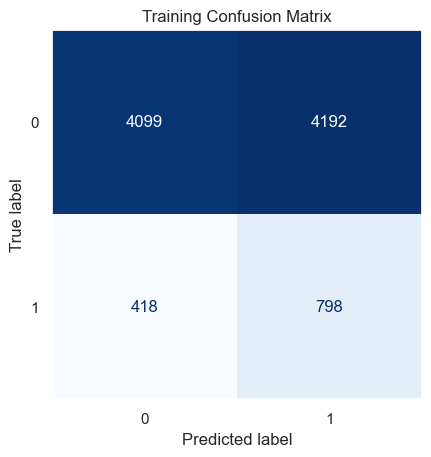

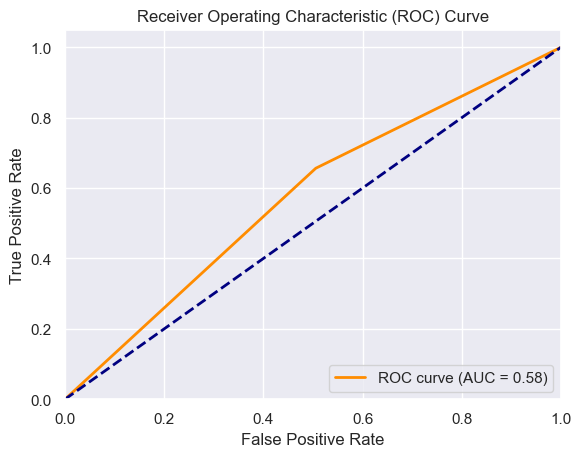

,Algorithm,Model,Description,DataType,Accuracy,RecallSensitivity,F1Score,AveragePrecision,Precision,Specificity,ROC_AUC_Score
0,LogisticRegression,lrc_boruta_fit,LogisticRegression - Grid Search - Boruta Feature Selection,Training,0.515094,0.65625,0.25717,0.148915,0.15992,0.494392,0.575321


In [22]:
# display report - training
Specificity, RecallSensitivity, Accuracy, Precision, F1, AveragePrecision, AUC = classifier_metrics(model, X_train[selected], y_train, flag=False)

# initialize variable
Type = 'Training'

# add to DataFrame
df_metrics = metricsClassfication(Algorithm, Model, Desc, Type, Specificity, RecallSensitivity, Accuracy, Precision, F1, AveragePrecision, AUC)

# copy first metrics dataframe
df_classfication = df_metrics.copy()

# dispaly
df_classfication

***** Classfication Metrics for Validation/Test:
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.50      0.65      2073
           1       0.16      0.64      0.25       304

    accuracy                           0.52      2377
   macro avg       0.53      0.57      0.45      2377
weighted avg       0.81      0.52      0.60      2377



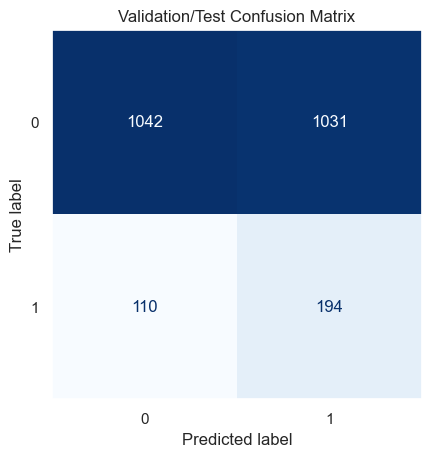

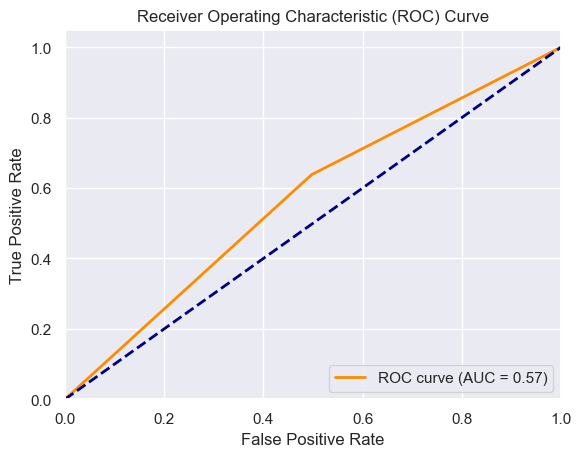

,Algorithm,Model,Description,DataType,Accuracy,RecallSensitivity,F1Score,AveragePrecision,Precision,Specificity,ROC_AUC_Score
0,LogisticRegression,lrc_boruta_fit,LogisticRegression - Grid Search - Boruta Feature Selection,Training,0.515094,0.656250,0.257170,0.148915,0.159920,0.494392,0.575321
1,LogisticRegression,lrc_boruta_fit,LogisticRegression - Grid Search - Boruta Feature Selection,Validation,0.519983,0.638158,0.253761,0.147340,0.158367,0.502653,0.570406


In [23]:
# display report - validation
Specificity, RecallSensitivity, BalancedAccuracy, Precision, F1, AveragePrecision, AUC = classifier_metrics(model, X_val[selected], y_val, flag=True)

# initialize variable
Type = 'Validation'

# add to DataFrame
df_metrics = metricsClassfication(Algorithm, Model, Desc, Type, Specificity, RecallSensitivity, BalancedAccuracy, Precision, F1, AveragePrecision, AUC)

# concat two dataframes
df_classfication = pd.concat([df_classfication, df_metrics], ignore_index=True)

# reset the index
df_classfication.reset_index(drop=True, inplace=True)

# dispaly
df_classfication

#### BalancedRandomForestClassifier
- an adaptation of the Random Forest Classifier that takes into account the class imbalance problem during the learning process.

In [24]:
# import library
from imblearn.ensemble import BalancedRandomForestClassifier

# the number of trees in the forest. More trees usually lead to better performance but will also increase computation time
n_estimators = list(np.linspace(20, 100, num=4, dtype=np.intc))
# the maximum depth of the individual trees. Limiting the depth can prevent overfitting, especially on noisy data.
# Default: None, which means nodes are expanded until all leaves are pure or until all leaves contain less than the minimum samples required.
max_depth = list(np.linspace(2, 5, num=3, dtype=np.intc))
# minimum number of samples required to split a node
min_samples_split = list(np.linspace(10, 35, num=3, dtype=np.intc))
sampling_strategy = [0.5, 0.75, 1.0]

# define the hyperparameter grid to search
parameters = dict(
n_estimators = n_estimators,
min_samples_split = min_samples_split,
max_depth = max_depth,
sampling_strategy = sampling_strategy
)

# Base Model
brfc_param = {'n_jobs': -1, 'random_state': RANDOM_STATE, 'replacement' : True, 'bootstrap': True}

# instantiate RandomForest Classifier
model = BalancedRandomForestClassifier(**brfc_param)

In [25]:
# initialize variables
Algorithm = 'BalancedRandomForestClassifier'
Desc = 'BalancedRandomForestClassifier - Grid Search - Boruta Feature Selection'
Model = 'brfc_boruta_fit'

# CV with grid search for Hyper-Parameter tuning
brfc_boruta_fit = stratified_grid(model, parameters, X_train[selected], y_train)

# best model
model = brfc_boruta_fit.best_estimator_

CV accuracy: 0.591 +/- 0.028


In [26]:
print(model)

BalancedRandomForestClassifier(bootstrap=True, max_depth=3,
                               min_samples_split=10, n_estimators=20, n_jobs=-1,
                               random_state=1776, replacement=True,
                               sampling_strategy=0.75)


                                      % Feature Importance
PriorCardiacSurgery_CAN_Y                        33.790929
Diabetes_CAN_Yes                                 25.861159
Transfusion_CAN_Y                                22.555212
DeathMechanism_DON_DRUG INTOXICATION             17.792700


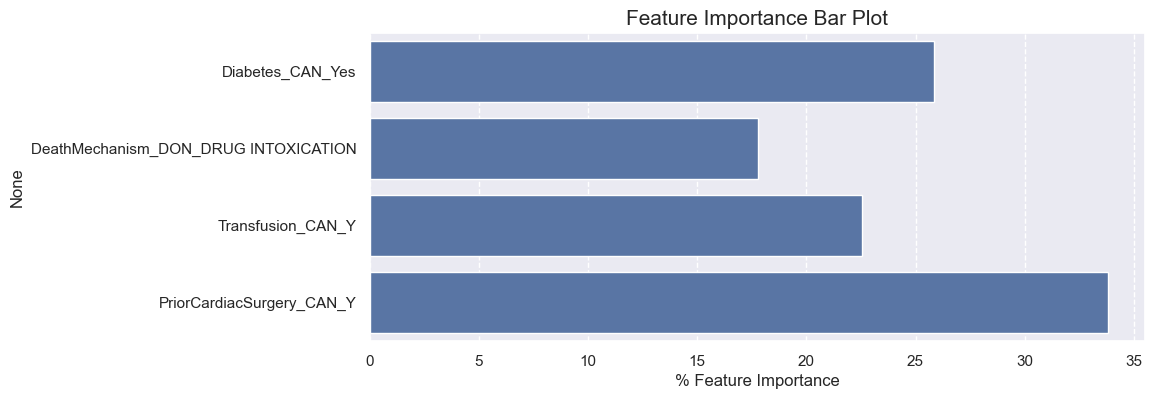

In [27]:
# plot
plotFeatureImportance(model, X_train[selected],figsize=(10,4))

***** Classfication Metrics for Training:
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      8291
           1       0.19      0.19      0.19      1216

    accuracy                           0.79      9507
   macro avg       0.53      0.53      0.53      9507
weighted avg       0.79      0.79      0.79      9507



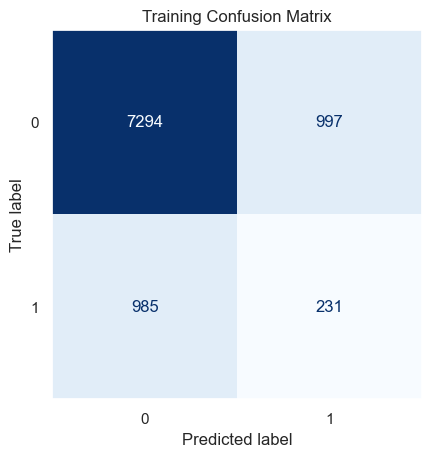

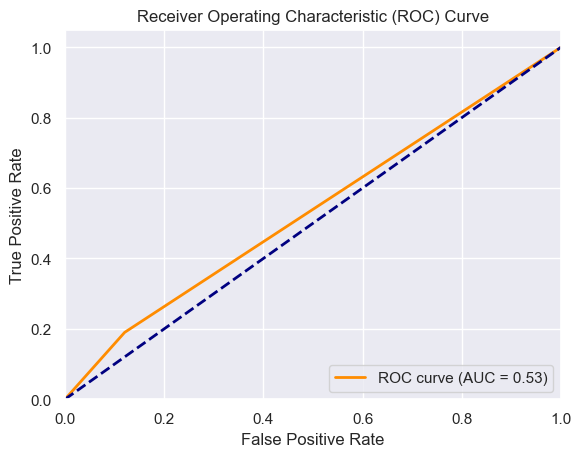

,Algorithm,Model,Description,DataType,Accuracy,RecallSensitivity,F1Score,AveragePrecision,Precision,Specificity,ROC_AUC_Score
0,LogisticRegression,lrc_boruta_fit,LogisticRegression - Grid Search - Boruta Feature Selection,Training,0.515094,0.656250,0.257170,0.148915,0.159920,0.494392,0.575321
1,LogisticRegression,lrc_boruta_fit,LogisticRegression - Grid Search - Boruta Feature Selection,Validation,0.519983,0.638158,0.253761,0.147340,0.158367,0.502653,0.570406
2,BalancedRandomForestClassifier,brfc_boruta_fit,BalancedRandomForestClassifier - Grid Search - Boruta Feature Selection,Training,0.791522,0.189967,0.189034,0.139343,0.188111,0.879749,0.534858


In [28]:
# display report - training
Specificity, RecallSensitivity, BalancedAccuracy, Precision, F1, AveragePrecision, AUC = classifier_metrics(model, X_train[selected], y_train, flag=False)

# initialize variable
Type = 'Training'

# add to DataFrame
df_metrics = metricsClassfication(Algorithm, Model, Desc, Type, Specificity, RecallSensitivity, BalancedAccuracy, Precision, F1, AveragePrecision, AUC)

# concat two dataframes
df_classfication = pd.concat([df_classfication, df_metrics], ignore_index=True)

# reset the index
df_classfication.reset_index(drop=True, inplace=True)

# dispaly
df_classfication

***** Classfication Metrics for Validation/Test:
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      2073
           1       0.21      0.20      0.20       304

    accuracy                           0.80      2377
   macro avg       0.54      0.54      0.54      2377
weighted avg       0.80      0.80      0.80      2377



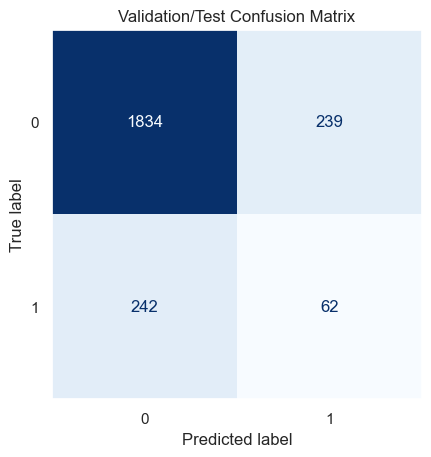

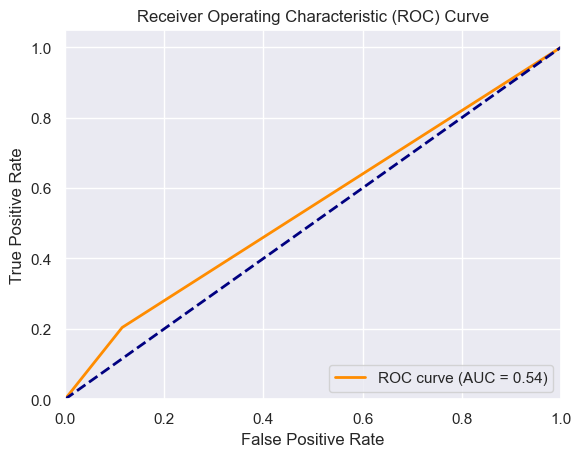

,Algorithm,Model,Description,DataType,Accuracy,RecallSensitivity,F1Score,AveragePrecision,Precision,Specificity,ROC_AUC_Score
0,LogisticRegression,lrc_boruta_fit,LogisticRegression - Grid Search - Boruta Feature Selection,Training,0.515094,0.656250,0.257170,0.148915,0.159920,0.494392,0.575321
1,LogisticRegression,lrc_boruta_fit,LogisticRegression - Grid Search - Boruta Feature Selection,Validation,0.519983,0.638158,0.253761,0.147340,0.158367,0.502653,0.570406
2,BalancedRandomForestClassifier,brfc_boruta_fit,BalancedRandomForestClassifier - Grid Search - Boruta Feature Selection,Training,0.791522,0.189967,0.189034,0.139343,0.188111,0.879749,0.534858
3,BalancedRandomForestClassifier,brfc_boruta_fit,BalancedRandomForestClassifier - Grid Search - Boruta Feature Selection,Validation,0.797644,0.203947,0.204959,0.143818,0.205980,0.884708,0.544328


In [29]:
# display report - validation
Specificity, RecallSensitivity, BalancedAccuracy, Precision, F1, AveragePrecision, AUC = classifier_metrics(model, X_val[selected], y_val, flag=True)

# initialize variable
Type = 'Validation'

# add to DataFrame
df_metrics = metricsClassfication(Algorithm, Model, Desc, Type, Specificity, RecallSensitivity, BalancedAccuracy, Precision, F1, AveragePrecision, AUC)

# concat two dataframes
df_classfication = pd.concat([df_classfication, df_metrics], ignore_index=True)

# reset the index
df_classfication.reset_index(drop=True, inplace=True)

# dispaly
df_classfication

#### XGBoost

In [30]:
# calculate the scale_pos_weight to adjust for class imbalance
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

# hyperparmeter
booster = ['gbtree','dart'] # controls the algorithm used for tree construction
max_depth = list(np.linspace(2, 7, num=3, dtype=np.intc))
learning_rate = [0.05, 0.1, 1] # learning rate
n_estimators = list(np.linspace(50, 120, num=3, dtype=np.intc)) # number of trees
subsample = [0.5, 0.7] # fraction of samples used for training trees
colsample_bytree = [0.5, 0.7] # fraction of features used for training trees
min_child_weight = list(np.linspace(3, 8, num=3, dtype=np.intc)) # a larger min_child_weight makes the algorithm more conservative
base_score = [.15, .25, .45, .5]


# define the hyperparameter grid to search
parameters = dict(
base_score = base_score,
max_depth = max_depth,
booster=booster,
learning_rate = learning_rate,
n_estimators = n_estimators,
subsample = subsample,
colsample_bytree = colsample_bytree,
min_child_weight = min_child_weight
)

# Base Model
xgb_param = {'scale_pos_weight': scale_pos_weight, 'tree_method': 'hist', 'n_jobs': -1,'random_state': RANDOM_STATE}

# instantiate XGB Classifier
model = XGBClassifier(**xgb_param)

In [31]:
# initialize variables
Algorithm = 'XGBClassifier'
Desc = 'XGBClassifier - Grid Search - Boruta Feature Selection'
Model = 'xgb_boruta_fit'

# CV with grid search for Hyper-Parameter tuning
xgb_boruta_fit = stratified_grid(model, parameters, X_train[selected], y_train, nSplit=5)

# best model
model = xgb_boruta_fit.best_estimator_

CV accuracy: 0.592 +/- 0.026


In [32]:
print(model)

XGBClassifier(base_score=0.15, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=120, n_jobs=-1,
              num_parallel_tree=None, random_state=1776, ...)


                                      % Feature Importance
PriorCardiacSurgery_CAN_Y                        38.138325
Transfusion_CAN_Y                                26.229685
Diabetes_CAN_Yes                                 22.849216
DeathMechanism_DON_DRUG INTOXICATION             12.782772


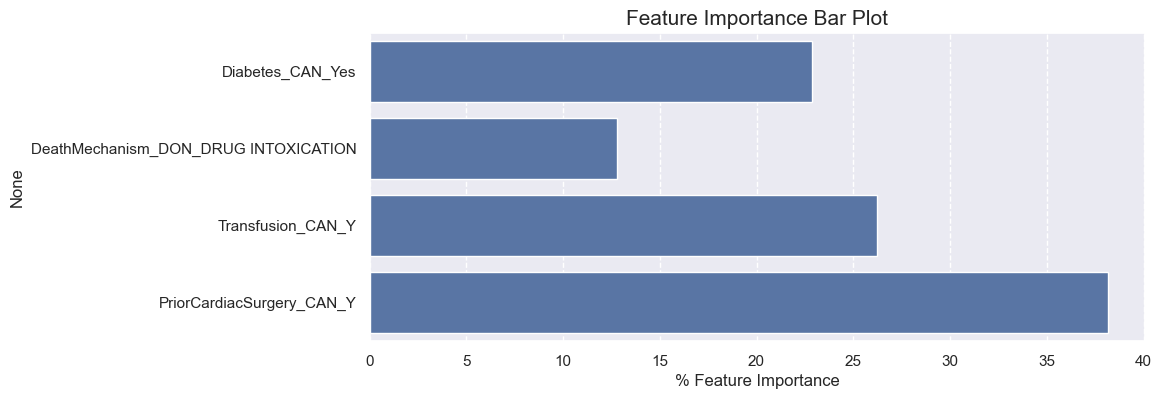

In [33]:
# plot
plotFeatureImportance(model, X_train[selected],figsize=(10,4))

***** Classfication Metrics for Training:
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.50      0.65      8291
           1       0.16      0.65      0.26      1216

    accuracy                           0.52      9507
   macro avg       0.53      0.58      0.45      9507
weighted avg       0.81      0.52      0.60      9507



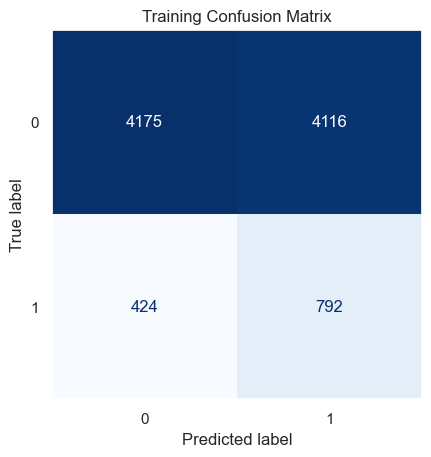

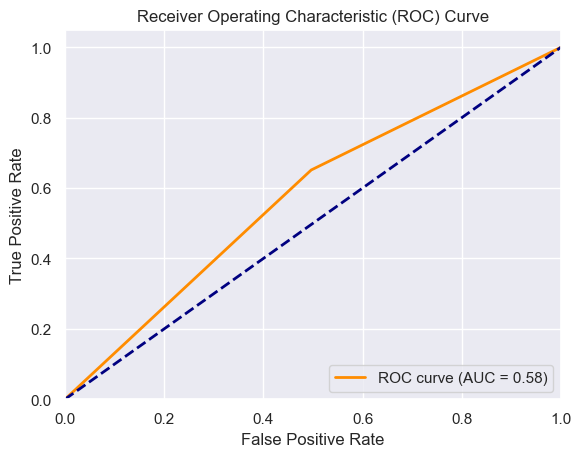

,Algorithm,Model,Description,DataType,Accuracy,RecallSensitivity,F1Score,AveragePrecision,Precision,Specificity,ROC_AUC_Score
0,LogisticRegression,lrc_boruta_fit,LogisticRegression - Grid Search - Boruta Feature Selection,Training,0.515094,0.656250,0.257170,0.148915,0.159920,0.494392,0.575321
1,LogisticRegression,lrc_boruta_fit,LogisticRegression - Grid Search - Boruta Feature Selection,Validation,0.519983,0.638158,0.253761,0.147340,0.158367,0.502653,0.570406
2,BalancedRandomForestClassifier,brfc_boruta_fit,BalancedRandomForestClassifier - Grid Search - Boruta Feature Selection,Training,0.791522,0.189967,0.189034,0.139343,0.188111,0.879749,0.534858
3,BalancedRandomForestClassifier,brfc_boruta_fit,BalancedRandomForestClassifier - Grid Search - Boruta Feature Selection,Validation,0.797644,0.203947,0.204959,0.143818,0.205980,0.884708,0.544328
4,XGBClassifier,xgb_boruta_fit,XGBClassifier - Grid Search - Boruta Feature Selection,Training,0.522457,0.651316,0.258654,0.149701,0.161369,0.503558,0.577437


In [34]:
# display report - training
Specificity, RecallSensitivity, Accuracy, Precision, F1, AveragePrecision, AUC = classifier_metrics(model, X_train[selected], y_train, flag=False)

# initialize variable
Type = 'Training'

# add to DataFrame
df_metrics = metricsClassfication(Algorithm, Model, Desc, Type, Specificity, RecallSensitivity, Accuracy, Precision, F1, AveragePrecision, AUC)

# concat two dataframes
df_classfication = pd.concat([df_classfication, df_metrics], ignore_index=True)

# reset the index
df_classfication.reset_index(drop=True, inplace=True)

# dispaly
df_classfication

***** Classfication Metrics for Validation/Test:
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.51      0.65      2073
           1       0.16      0.62      0.25       304

    accuracy                           0.52      2377
   macro avg       0.53      0.56      0.45      2377
weighted avg       0.81      0.52      0.60      2377



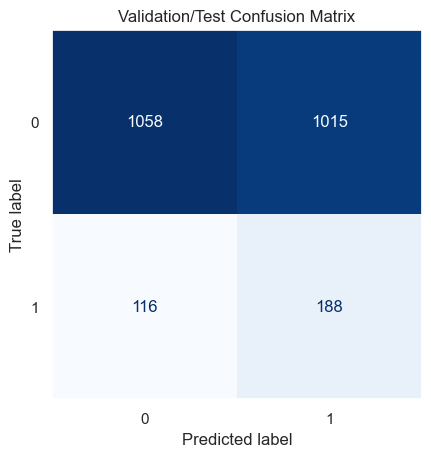

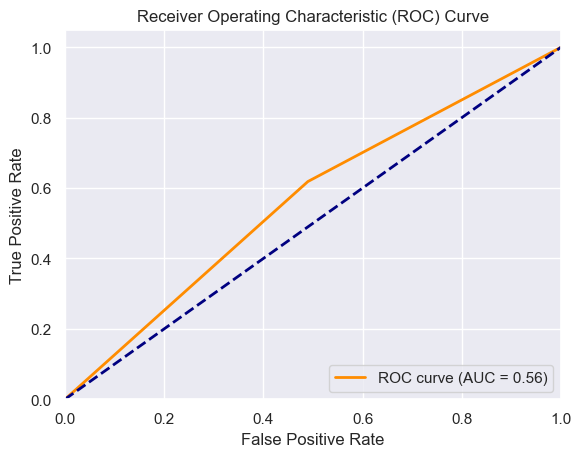

,Algorithm,Model,Description,DataType,Accuracy,RecallSensitivity,F1Score,AveragePrecision,Precision,Specificity,ROC_AUC_Score
0,LogisticRegression,lrc_boruta_fit,LogisticRegression - Grid Search - Boruta Feature Selection,Training,0.515094,0.656250,0.257170,0.148915,0.159920,0.494392,0.575321
1,LogisticRegression,lrc_boruta_fit,LogisticRegression - Grid Search - Boruta Feature Selection,Validation,0.519983,0.638158,0.253761,0.147340,0.158367,0.502653,0.570406
2,BalancedRandomForestClassifier,brfc_boruta_fit,BalancedRandomForestClassifier - Grid Search - Boruta Feature Selection,Training,0.791522,0.189967,0.189034,0.139343,0.188111,0.879749,0.534858
3,BalancedRandomForestClassifier,brfc_boruta_fit,BalancedRandomForestClassifier - Grid Search - Boruta Feature Selection,Validation,0.797644,0.203947,0.204959,0.143818,0.205980,0.884708,0.544328
4,XGBClassifier,xgb_boruta_fit,XGBClassifier - Grid Search - Boruta Feature Selection,Training,0.522457,0.651316,0.258654,0.149701,0.161369,0.503558,0.577437
5,XGBClassifier,xgb_boruta_fit,XGBClassifier - Grid Search - Boruta Feature Selection,Validation,0.524190,0.618421,0.249502,0.145445,0.156276,0.510371,0.564396


In [35]:
# display report - validation
Specificity, RecallSensitivity, Accuracy, Precision, F1, AveragePrecision, AUC = classifier_metrics(model, X_val[selected], y_val, flag=True)

# initialize variable
Type = 'Validation'

# add to DataFrame
df_metrics = metricsClassfication(Algorithm, Model, Desc, Type, Specificity, RecallSensitivity, Accuracy, Precision, F1, AveragePrecision, AUC)

# concat two dataframes
df_classfication = pd.concat([df_classfication, df_metrics], ignore_index=True)

# reset the index
df_classfication.reset_index(drop=True, inplace=True)

# dispaly
df_classfication

#### XGBoost 2

In [36]:
# calculate the scale_pos_weight to adjust for class imbalance
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

# hyperparmeter
reg_alpha = [1, 5, 10, 50]
reg_lambda = [1, 5, 10, 50]

# define the hyperparameter grid to search
parameters = dict(
reg_alpha = reg_alpha,
reg_lambda = reg_lambda    
)

# Base Model
xgb_param = {'scale_pos_weight': scale_pos_weight, 
             'base_score' : .45,
             'booster': 'dart',
             'colsample_bytree': 0.5,
             'learning_rate': 0.1,
             'max_depth': 2,
             'min_child_weight': 3,
             'n_estimators': 85,
             'tree_method': 'hist', 
             'n_jobs': -1,
             'random_state': RANDOM_STATE}

# instantiate XGB Classifier
model = XGBClassifier(**xgb_param)

In [37]:
# initialize variables
Algorithm = 'XGBClassifier'
Desc = 'XGBClassifier - Grid Search - Boruta Feature Selection'
Model = 'xgb_5A_fit'

# CV with grid search for Hyper-Parameter tuning
xgb_5A_fit = stratified_grid(model, parameters, X_train[selected], y_train, nSplit=5)

# best model
model = xgb_5A_fit.best_estimator_

CV accuracy: 0.590 +/- 0.028


In [38]:
print(xgb_5A_fit.best_estimator_)

XGBClassifier(base_score=0.45, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=85, n_jobs=-1,
              num_parallel_tree=None, random_state=1776, ...)


                                      % Feature Importance
PriorCardiacSurgery_CAN_Y                        37.795338
Diabetes_CAN_Yes                                 26.664225
Transfusion_CAN_Y                                24.766415
DeathMechanism_DON_DRUG INTOXICATION             10.774023


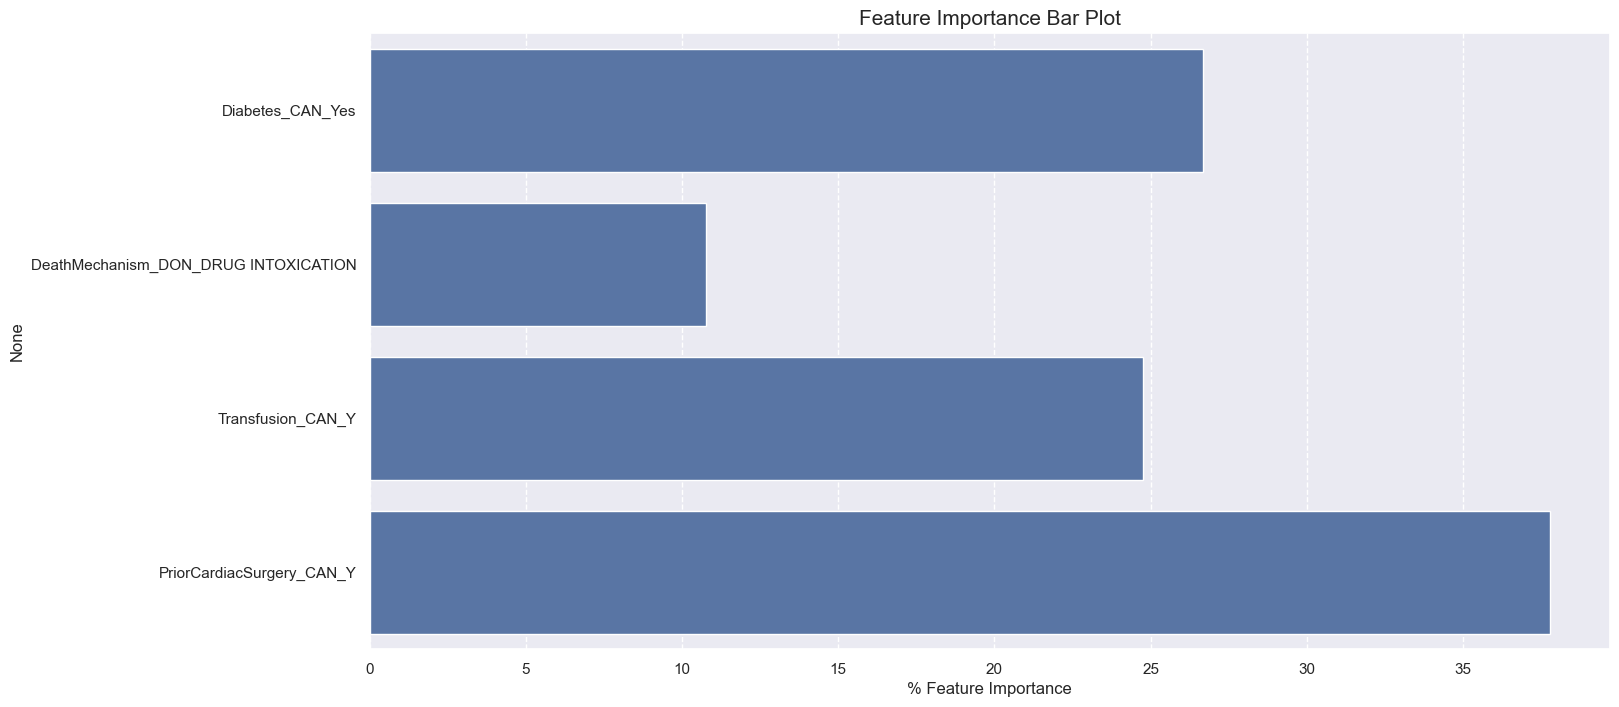

In [39]:
# plot
plotFeatureImportance(model, X_train[selected],figsize=(16,8))

***** Classfication Metrics for Training:
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.50      0.65      8291
           1       0.16      0.65      0.26      1216

    accuracy                           0.52      9507
   macro avg       0.53      0.58      0.45      9507
weighted avg       0.81      0.52      0.60      9507



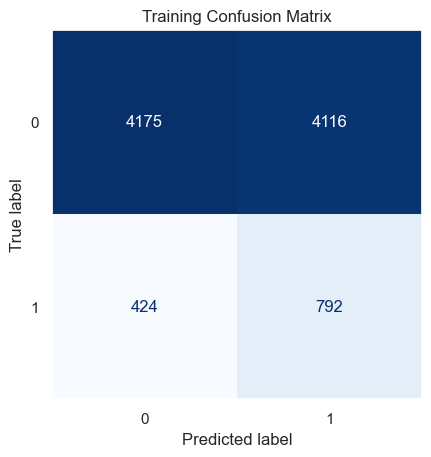

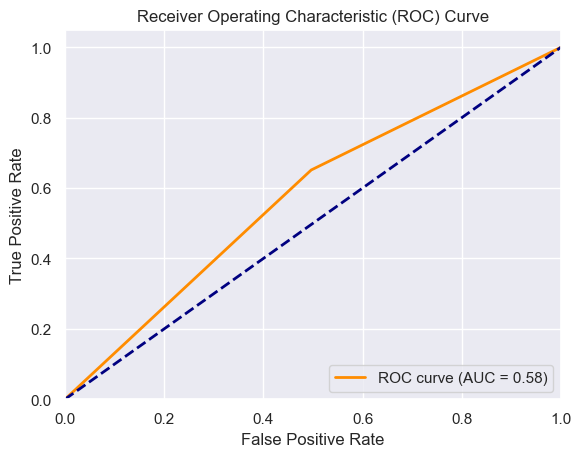

,Algorithm,Model,Description,DataType,Accuracy,RecallSensitivity,F1Score,AveragePrecision,Precision,Specificity,ROC_AUC_Score
0,LogisticRegression,lrc_boruta_fit,LogisticRegression - Grid Search - Boruta Feature Selection,Training,0.515094,0.656250,0.257170,0.148915,0.159920,0.494392,0.575321
1,LogisticRegression,lrc_boruta_fit,LogisticRegression - Grid Search - Boruta Feature Selection,Validation,0.519983,0.638158,0.253761,0.147340,0.158367,0.502653,0.570406
2,BalancedRandomForestClassifier,brfc_boruta_fit,BalancedRandomForestClassifier - Grid Search - Boruta Feature Selection,Training,0.791522,0.189967,0.189034,0.139343,0.188111,0.879749,0.534858
3,BalancedRandomForestClassifier,brfc_boruta_fit,BalancedRandomForestClassifier - Grid Search - Boruta Feature Selection,Validation,0.797644,0.203947,0.204959,0.143818,0.205980,0.884708,0.544328
4,XGBClassifier,xgb_boruta_fit,XGBClassifier - Grid Search - Boruta Feature Selection,Training,0.522457,0.651316,0.258654,0.149701,0.161369,0.503558,0.577437
5,XGBClassifier,xgb_boruta_fit,XGBClassifier - Grid Search - Boruta Feature Selection,Validation,0.524190,0.618421,0.249502,0.145445,0.156276,0.510371,0.564396
6,XGBClassifier,xgb_5A_fit,XGBClassifier - Grid Search - Boruta Feature Selection,Training,0.522457,0.651316,0.258654,0.149701,0.161369,0.503558,0.577437


In [40]:
# display report - training
Specificity, RecallSensitivity, Accuracy, Precision, F1, AveragePrecision, AUC = classifier_metrics(model, X_train[selected], y_train, flag=False)

# initialize variable
Type = 'Training'

# add to DataFrame
df_metrics = metricsClassfication(Algorithm, Model, Desc, Type, Specificity, RecallSensitivity, Accuracy, Precision, F1, AveragePrecision, AUC)

# concat two dataframes
df_classfication = pd.concat([df_classfication, df_metrics], ignore_index=True)

# reset the index
df_classfication.reset_index(drop=True, inplace=True)

# dispaly
df_classfication

***** Classfication Metrics for Validation/Test:
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.51      0.65      2073
           1       0.16      0.62      0.25       304

    accuracy                           0.52      2377
   macro avg       0.53      0.56      0.45      2377
weighted avg       0.81      0.52      0.60      2377



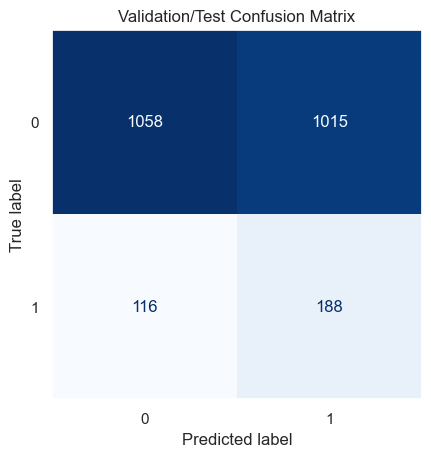

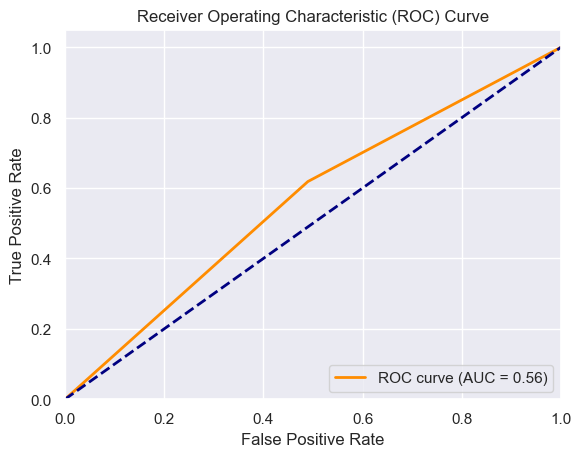

,Algorithm,Model,Description,DataType,Accuracy,RecallSensitivity,F1Score,AveragePrecision,Precision,Specificity,ROC_AUC_Score
0,LogisticRegression,lrc_boruta_fit,LogisticRegression - Grid Search - Boruta Feature Selection,Training,0.515094,0.656250,0.257170,0.148915,0.159920,0.494392,0.575321
1,LogisticRegression,lrc_boruta_fit,LogisticRegression - Grid Search - Boruta Feature Selection,Validation,0.519983,0.638158,0.253761,0.147340,0.158367,0.502653,0.570406
2,BalancedRandomForestClassifier,brfc_boruta_fit,BalancedRandomForestClassifier - Grid Search - Boruta Feature Selection,Training,0.791522,0.189967,0.189034,0.139343,0.188111,0.879749,0.534858
3,BalancedRandomForestClassifier,brfc_boruta_fit,BalancedRandomForestClassifier - Grid Search - Boruta Feature Selection,Validation,0.797644,0.203947,0.204959,0.143818,0.205980,0.884708,0.544328
4,XGBClassifier,xgb_boruta_fit,XGBClassifier - Grid Search - Boruta Feature Selection,Training,0.522457,0.651316,0.258654,0.149701,0.161369,0.503558,0.577437
5,XGBClassifier,xgb_boruta_fit,XGBClassifier - Grid Search - Boruta Feature Selection,Validation,0.524190,0.618421,0.249502,0.145445,0.156276,0.510371,0.564396
6,XGBClassifier,xgb_5A_fit,XGBClassifier - Grid Search - Boruta Feature Selection,Training,0.522457,0.651316,0.258654,0.149701,0.161369,0.503558,0.577437
7,XGBClassifier,xgb_5A_fit,XGBClassifier - Grid Search - Boruta Feature Selection,Validation,0.524190,0.618421,0.249502,0.145445,0.156276,0.510371,0.564396


In [41]:
# display report - validation
Specificity, RecallSensitivity, Accuracy, Precision, F1, AveragePrecision, AUC = classifier_metrics(model, X_val[selected], y_val, flag=True)

# initialize variable
Type = 'Validation'

# add to DataFrame
df_metrics = metricsClassfication(Algorithm, Model, Desc, Type, Specificity, RecallSensitivity, Accuracy, Precision, F1, AveragePrecision, AUC)

# concat two dataframes
df_classfication = pd.concat([df_classfication, df_metrics], ignore_index=True)

# reset the index
df_classfication.reset_index(drop=True, inplace=True)

# dispaly
df_classfication

##### Metrics
- `Accuracy` is a metric used to evaluate the performance of a classification model. It measures the proportion of correct predictions out of the total predictions made.
- `Recall`, also known as `Sensitivity` or `True Positive Rate` (TPR), is a metric used to evaluate the performance of a classification model, particularly in situations where correctly identifying positive cases
- The `F1 score` is the harmonic mean of `precision` and `recall`. It ranges from 0 to 1, where 1 indicates the best possible performance.
- `Average Precision` calculates the area under the precision-recall curve by averaging precision values at increasing recall levels.
- `Precision` is a metric used to evaluate the accuracy of positive predictions in a classification model, particularly useful in binary classification tasks. It measures how many of the instances predicted as positive are actually positive.
- `Specificity` (also known as the `True Negative Rate`) is a metric used in binary classification to measure the model’s ability to correctly identify negative instances. It tells us the proportion of actual negatives that were correctly classified as negative by the model.
- The `ROC AUC score` is a performance metric for classification models, particularly useful for evaluating models in binary classification tasks. It combines Receiver Operating Characteristic (ROC) curve analysis with the Area Under the Curve (AUC).
    -  The area under the ROC curve (AUC) provides a single value summary of the model's ability to discriminate between positive and negative classes. It ranges from 0 to 1, where:
    - AUC = 1: Perfect classifier (it perfectly separates positive and negative classes).
    - AUC = 0.5: Model has no discrimination ability (equivalent to random guessing).
    - AUC < 0.5: The model performs worse than random guessing (this suggests the model may need to be inverted or there’s an issue with the model).